In [53]:
import scipy.io
import scipy
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from collections import defaultdict
from dendrogram_weights import get_dendrogram_weights
from general_htsne import g_htsne
from general_tsne import g_tsne
from importlib import reload 

In [152]:
from hierarchy import dendrogram_norm

In [51]:
import general_tsne

In [52]:
reload(general_tsne)

<module 'general_tsne' from '/home/mstrals/MSTER-ALS-Matrix-Factorization/tsne/general_tsne.py'>

In [111]:
SAMPLE_SIZE=800

In [96]:
np.random.seed(42)

In [140]:
def plot_blobs(X, y, label_map, size=6, title=None, fig_len=10):
    plt.figure(figsize=(fig_len,fig_len))
    plt.axis("equal")
    if (title):
        plt.title(title)
    labels = np.unique(y)
    print(labels)
    plt.grid(True)
    for label in labels:
        plt.scatter(X[y==label][:,0], X[y==label][:,1], s=size, label = label_map[label])
    plt.legend()
    plt.show()
        

In [5]:
mat = scipy.io.loadmat('../../20newsgroups/text_newsgrp.mat')

In [6]:
mat['dat'][0][0]

<1000x61298 sparse matrix of type '<class 'numpy.float64'>'
	with 87171 stored elements in Compressed Sparse Column format>

In [7]:
from sklearn.datasets import fetch_20newsgroups

In [82]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [92]:
len(newsgroups_train.data)

11314

In [9]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [107]:
categories = ['rec.sport.baseball','rec.sport.hockey','sci.electronics', 'sci.space','sci.med']

In [108]:
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [109]:
sample_ids = np.random.permutation(len(newsgroups_train.data))

In [110]:
vectorizer = TfidfVectorizer()

In [115]:
vectors = vectorizer.fit_transform(np.array(newsgroups_train.data)[sample_ids[:SAMPLE_SIZE]])

In [116]:
vectors.shape

(800, 22636)

In [117]:
vectors

<800x22636 sparse matrix of type '<class 'numpy.float64'>'
	with 126881 stored elements in Compressed Sparse Row format>

In [118]:
y = newsgroups_train.target[sample_ids[:SAMPLE_SIZE]]

In [119]:
from sklearn.manifold import TSNE

In [121]:
visualized = TSNE(n_components=2,verbose=True,n_iter=1000, perplexity=30, early_exaggeration=20).fit_transform(vectors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.002s...
[t-SNE] Computed neighbors for 800 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 0.271423
[t-SNE] KL divergence after 250 iterations with early exaggeration: 167.652985
[t-SNE] KL divergence after 1000 iterations: 1.595222


Preprocessing done...


Iteration 100: error is 25.562938
Iteration 200: error is 4.412345
Iteration 300: error is 4.080612
Iteration 400: error is 3.848692
Iteration 500: error is 3.670179
Iteration 600: error is 3.524967
Iteration 700: error is 3.402773
Iteration 800: error is 3.297882
Iteration 900: error is 3.206247
Iteration 1000: error is 3.124880


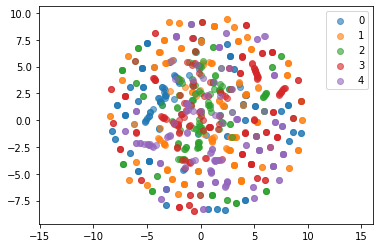

In [123]:
visualized = g_tsne(vectors.toarray(), y, save_name="20_news", iterations=1000)

[0 1 2 3 4]


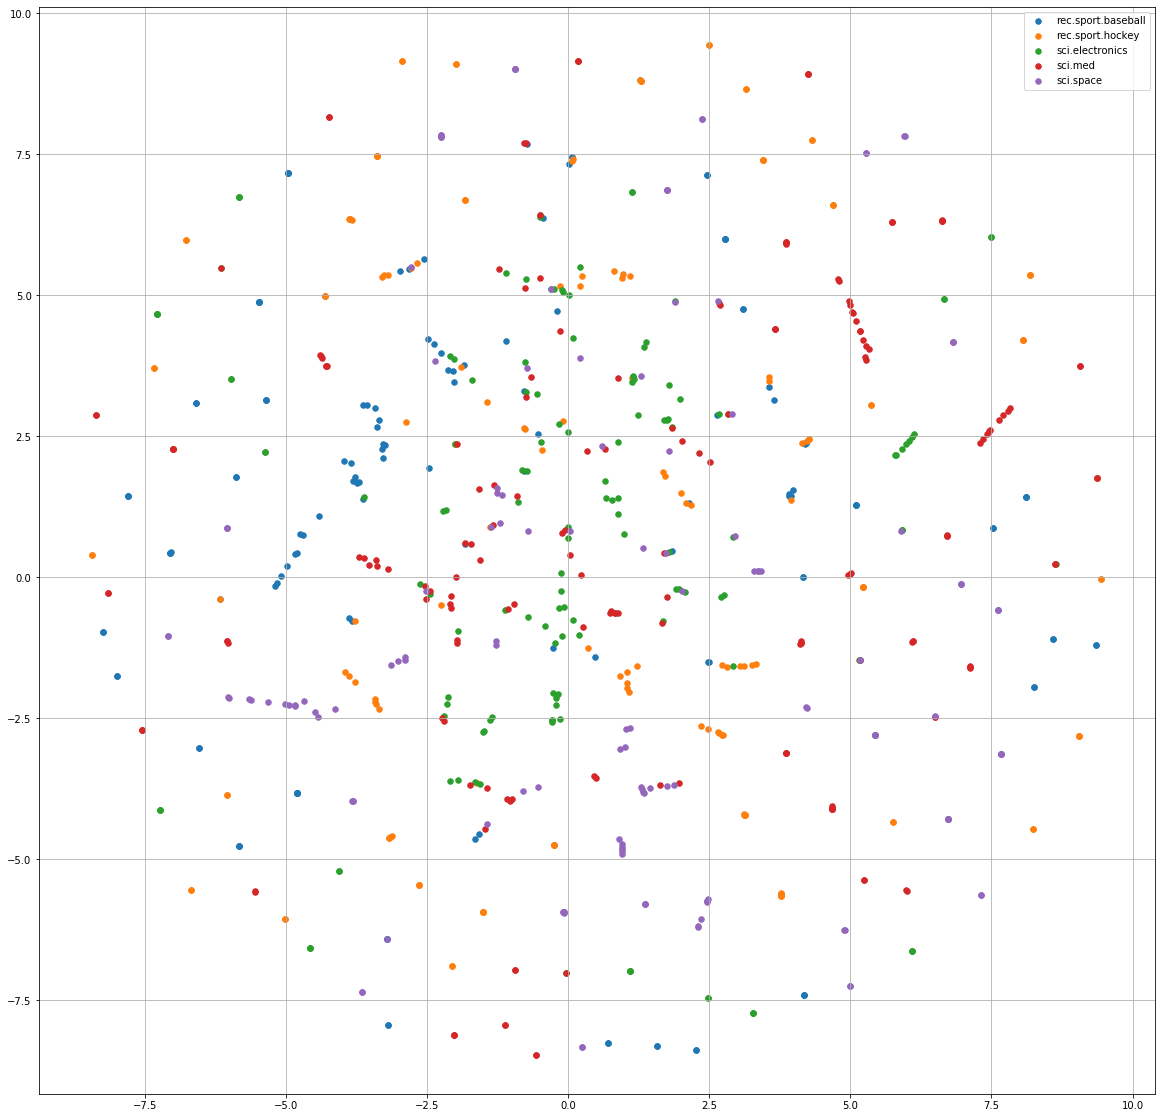

In [124]:
plot_blobs(visualized, y, newsgroups_train.target_names, size=30)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


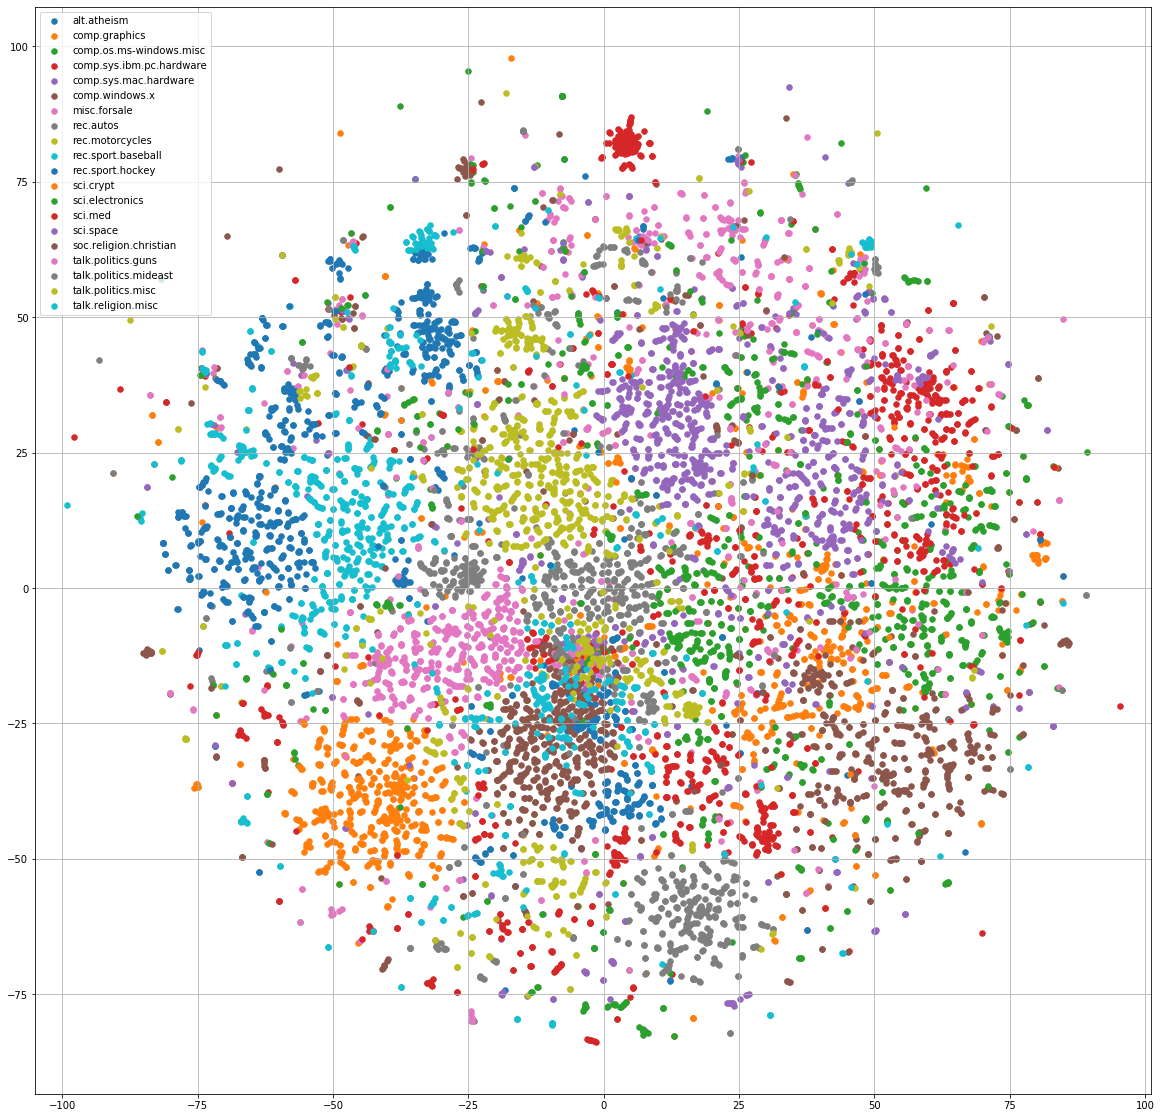

In [106]:
plot_blobs(visualized, y, newsgroups_train.target_names, size=30)

[0 1 2 3 4]


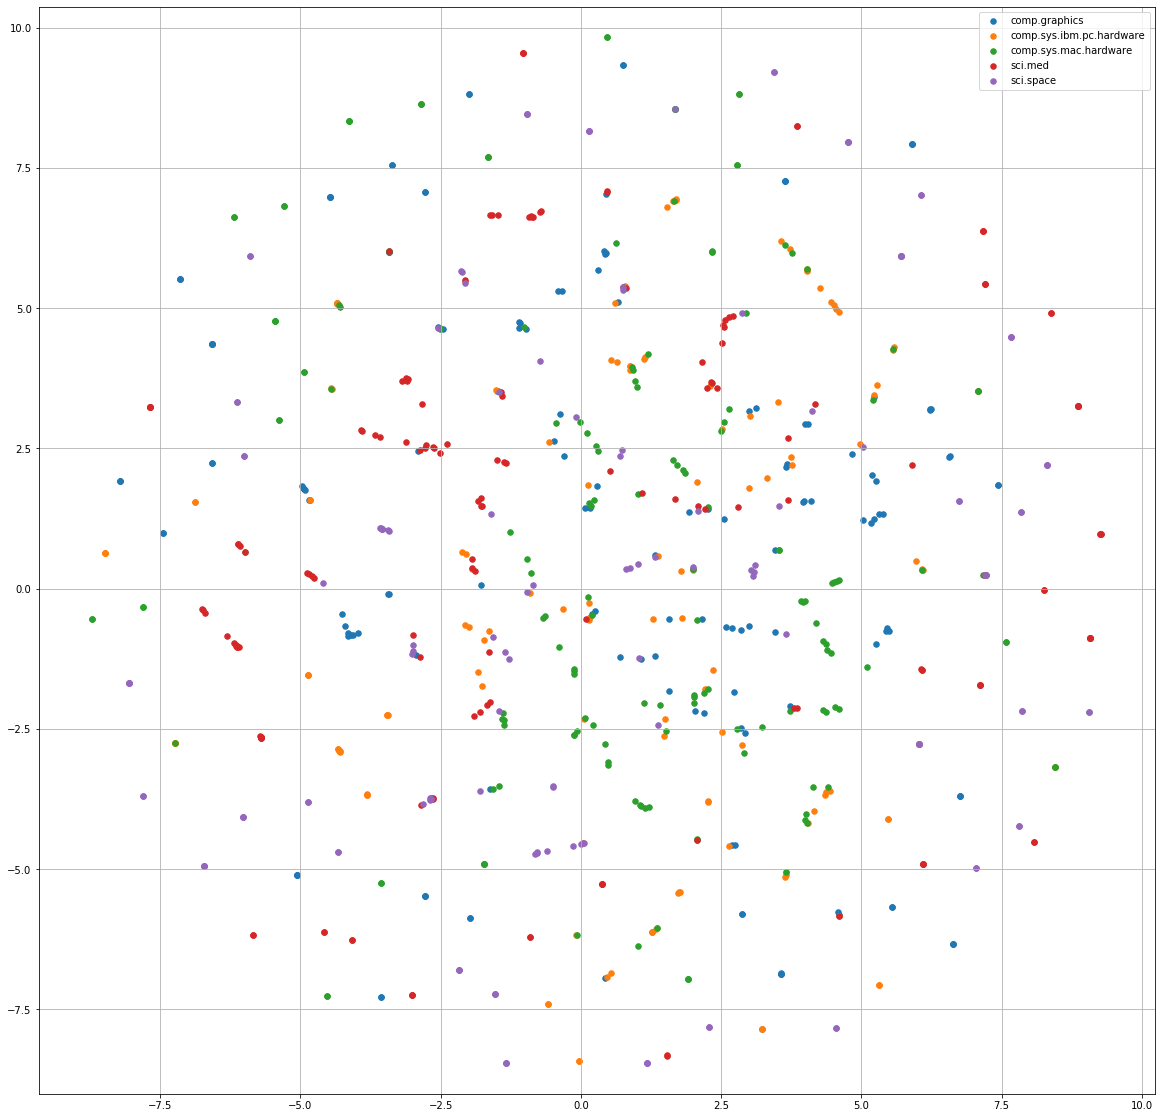

In [63]:
plot_blobs(visualized, y, newsgroups_train.target_names, size=30)

array([7.41393857e-02, 1.05242934e-01, 4.81135929e-02, 2.23011251e-02,
       4.18727190e-03, 3.62746997e-02, 6.23063898e-03, 1.32930450e-02,
       1.93989677e-03, 5.55989659e-05, 2.82693783e-03, 9.98948270e-03,
       4.90049557e-03, 3.45404739e-03, 5.32249934e-03, 1.09989981e-02,
       3.27169511e-03, 2.62143497e-02, 1.22146222e-02, 2.22564861e-03,
       7.34627147e-03, 1.44804229e-03, 2.50579751e-04, 1.76600758e-04,
       5.84971616e-03, 5.61122853e-04, 2.50207661e-03, 9.46284598e-04,
       1.98942422e-03, 1.22635096e-03, 1.70837794e-04, 2.26843234e-03,
       1.63603239e-03, 4.48913006e-03, 8.43401363e-04, 1.51230842e-03,
       2.28041250e-03, 1.66278982e-04, 1.57423672e-05, 3.17037185e-03,
       5.37354599e-03, 2.72280045e-03, 3.08229889e-04, 1.53180700e-03,
       8.18144603e-04, 2.40761404e-04, 2.69434138e-05, 1.19998680e-04,
       4.86472887e-04, 9.68061182e-04, 2.18512438e-03, 6.71147958e-04,
       1.28546098e-03, 1.97022042e-03, 3.59945946e-04, 4.47053249e-03,
      

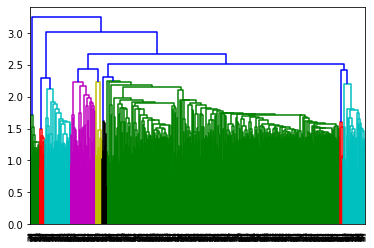

In [64]:
get_dendrogram_weights(vectors.toarray())

In [125]:
SAMPLE_SIZE=800

np.random.seed(42)

categories = ['rec.sport.baseball','rec.sport.hockey','sci.electronics', 'sci.space','sci.med']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

sample_ids = np.random.permutation(len(newsgroups_train.data))

vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(np.array(newsgroups_train.data)[sample_ids[:SAMPLE_SIZE]])
y = newsgroups_train.target[sample_ids[:SAMPLE_SIZE]]


array([5.70226615e-02, 1.20163402e-01, 5.74264741e-02, 2.94625206e-03,
       1.98581610e-03, 1.72544356e-02, 5.27428673e-03, 1.94301653e-02,
       1.60951833e-02, 5.83443588e-05, 6.40566379e-03, 8.95830677e-03,
       1.04055806e-02, 3.24542082e-03, 9.24642798e-03, 2.36906060e-03,
       7.14904416e-03, 1.25953451e-02, 1.94834409e-03, 9.34887580e-03,
       4.01682653e-03, 2.12776023e-04, 3.84237160e-03, 1.40969135e-03,
       2.39281410e-03, 1.53144261e-03, 2.18051683e-03, 2.65204640e-03,
       8.45142952e-03, 5.34896688e-04, 6.30471994e-03, 1.31999225e-03,
       3.58487351e-04, 6.71820366e-03, 5.97622100e-03, 3.07547902e-03,
       7.60817287e-04, 1.58409147e-03, 2.74080355e-03, 3.52845344e-04,
       7.36339156e-04, 2.35770901e-03, 2.52254969e-04, 1.23038744e-03,
       8.74419590e-04, 3.54823086e-04, 1.35289369e-03, 2.63874706e-04,
       2.27556544e-03, 1.63016051e-03, 2.12750390e-03, 8.78198565e-04,
       2.43542883e-03, 1.53855265e-04, 4.40750716e-04, 5.42947561e-04,
      

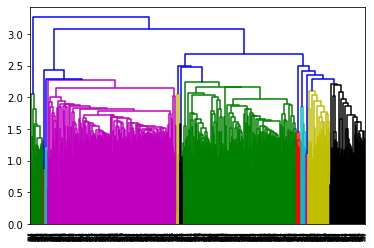

In [146]:
## original dendrogram:

get_dendrogram_weights(vectors.toarray())

In [135]:
htsne_result = np.load("20_news_htsne_htsne_data.npy")

In [142]:
tsne_result = np.loadtxt("20_news_y.csv", delimiter=",")

In [148]:
double_htsne_result = np.load("20_news_htsne_weight_doubling_htsne_data.npy")

[0 1 2 3 4]


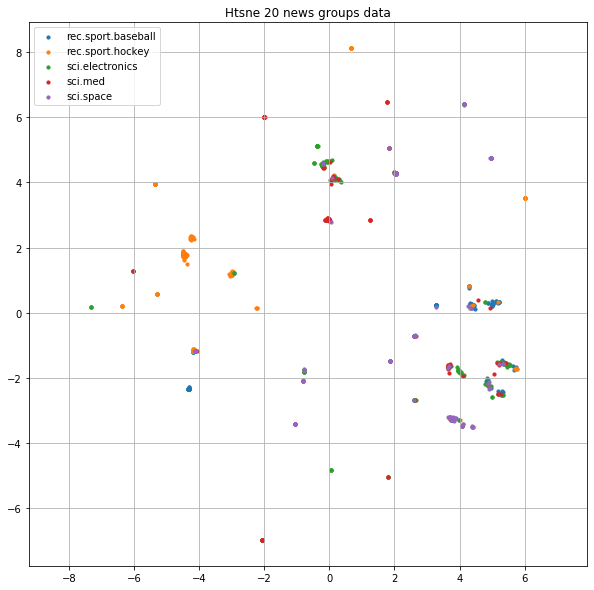

In [141]:
plot_blobs(htsne_result, y, newsgroups_train.target_names, title="Htsne 20 news groups data", size=10)

array([1.39367995e-01, 3.92386450e-01, 1.87517994e-01, 4.53965985e-03,
       5.79429040e-02, 2.40314703e-02, 3.30392973e-02, 2.76900645e-03,
       2.34794745e-02, 6.36985247e-03, 1.06454201e-02, 1.73207325e-02,
       2.59696572e-04, 1.76998192e-03, 1.18255468e-04, 2.08024650e-02,
       2.53385791e-03, 4.16829811e-04, 2.96904298e-04, 1.51860628e-02,
       5.58639657e-03, 1.30339860e-02, 6.22827386e-04, 4.76857462e-05,
       3.17871517e-03, 2.26635470e-03, 7.95393831e-04, 1.27896869e-03,
       1.90569463e-04, 3.39223613e-03, 1.12330622e-04, 2.49000053e-03,
       1.31101513e-03, 2.99885937e-04, 5.75382127e-03, 7.21950848e-04,
       1.64858431e-03, 1.89637045e-04, 1.27384816e-03, 1.10380008e-04,
       8.68920890e-04, 3.27236768e-03, 2.01664436e-03, 1.52966052e-03,
       1.78675110e-04, 1.14187135e-04, 1.02402124e-03, 6.68896959e-04,
       4.63496336e-04, 3.98923440e-04, 3.88227942e-04, 4.84988487e-05,
       1.17694348e-04, 1.28630870e-04, 1.31931940e-04, 4.31810463e-05,
      

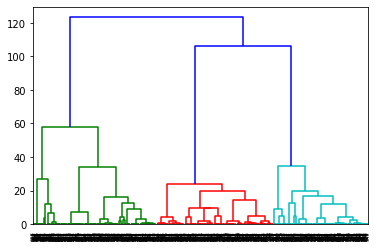

In [144]:
get_dendrogram_weights(htsne_result)

In [156]:
dendrogram_norm(vectors.toarray(), htsne_result)

      fun: 1418.4671286661958
 hess_inv: array([[1.37281194e-05]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.04913406])


1418.4671286661958

[0 1 2 3 4]


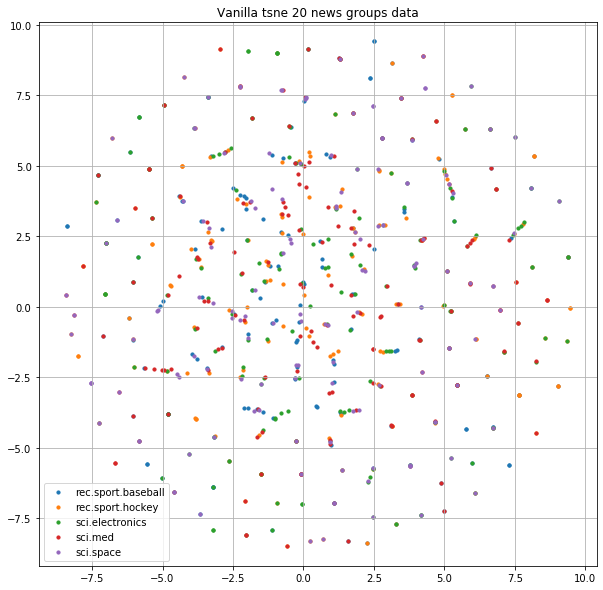

In [151]:
plot_blobs(tsne_result, y, newsgroups_train.target_names, title="Vanilla tsne 20 news groups data", size=10)

array([2.19274473e-01, 1.54163060e-01, 2.04055102e-01, 1.10324037e-01,
       2.49721744e-03, 1.45500066e-02, 4.40553591e-02, 8.66555853e-03,
       1.53016231e-02, 4.16593907e-02, 5.49376088e-04, 3.14005162e-02,
       7.78088095e-03, 7.15566461e-03, 1.61724207e-02, 1.09149592e-02,
       8.82898813e-03, 2.57986190e-04, 3.59750020e-03, 2.58490631e-03,
       4.51056592e-03, 7.67629848e-04, 7.52662864e-03, 2.21194152e-03,
       9.25576695e-04, 8.53774260e-04, 2.33614579e-03, 4.40270428e-03,
       1.34266255e-03, 2.20064572e-03, 5.94356075e-04, 1.08071601e-03,
       1.12647896e-03, 2.29188738e-03, 8.33380693e-04, 1.91280591e-03,
       9.67172501e-04, 8.78698870e-03, 2.44149667e-03, 3.14201700e-04,
       2.17588838e-03, 4.41693197e-04, 2.68440275e-04, 1.71221487e-03,
       3.97559530e-04, 7.70300035e-04, 4.26726219e-05, 6.07713731e-04,
       1.68297864e-03, 1.08008912e-03, 1.98076110e-03, 4.94071263e-06,
       6.73422760e-04, 4.78637695e-04, 7.70378313e-04, 5.07076533e-05,
      

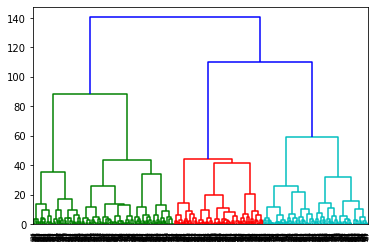

In [147]:
get_dendrogram_weights(tsne_result)

In [154]:
dendrogram_norm(vectors.toarray(), tsne_result)

      fun: 1309.3222606774343
 hess_inv: array([[8.39517337e-06]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 4
     njev: 24
   status: 0
  success: True
        x: array([0.05747779])


1309.3222606774343

[0 1 2 3 4]


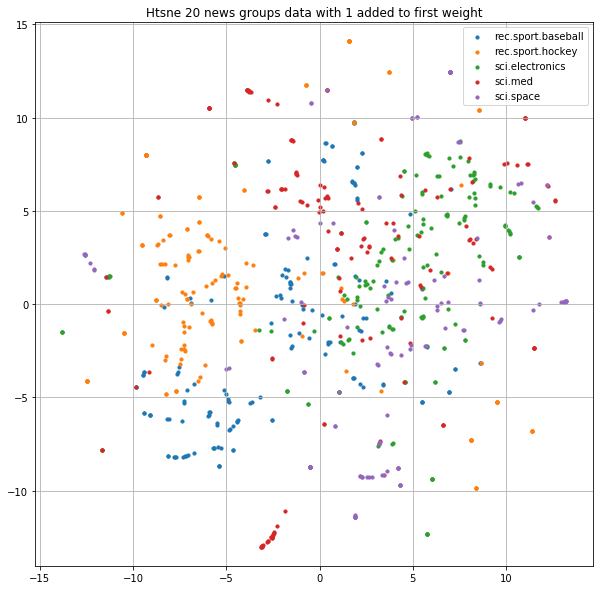

In [150]:
plot_blobs(double_htsne_result, y, newsgroups_train.target_names, title=
           "Htsne 20 news groups data with 1 added to first weight", size=10)

array([3.67508428e-01, 5.94705721e-02, 1.62611558e-01, 3.76284642e-02,
       6.04634891e-02, 6.91738824e-02, 1.39689080e-02, 2.70299184e-02,
       2.06805760e-02, 7.39867035e-03, 1.10121912e-02, 3.01983044e-02,
       1.71897806e-03, 1.12304009e-02, 1.40532548e-02, 2.34840960e-03,
       5.78597825e-04, 1.16608516e-03, 3.04765530e-03, 3.21052045e-03,
       4.55138725e-03, 3.26398017e-03, 8.62530546e-03, 1.87889621e-03,
       3.30341374e-03, 2.40299034e-03, 2.28177269e-03, 7.45064229e-03,
       1.76144386e-03, 6.78104650e-04, 5.07202806e-04, 3.84101097e-04,
       1.06562700e-03, 2.70271997e-03, 9.74695276e-04, 1.96082179e-03,
       4.44322574e-04, 1.82876842e-03, 1.20132379e-03, 1.01220519e-03,
       1.76049792e-03, 1.78587572e-03, 1.41414523e-03, 5.47303240e-04,
       7.18901263e-04, 2.64315216e-04, 4.53103592e-04, 3.80311053e-03,
       7.32691218e-04, 2.25742984e-04, 8.81764483e-04, 1.55189419e-03,
       7.30143084e-04, 8.60572180e-04, 3.66159710e-04, 3.81382555e-04,
      

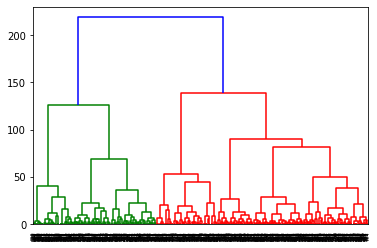

In [155]:
get_dendrogram_weights(double_htsne_result)

In [153]:
dendrogram_norm(vectors.toarray(), double_htsne_result)

      fun: 1321.785032406422
 hess_inv: array([[3.95647131e-06]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.03822047])


1321.785032406422